# Example code for visualizing, results

## Setup

In [1]:
from glob import glob
import numpy as np
import scipy as sp
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

if os.path.split(os.getcwd())[-1] != 'structure-from-sound-python':
    os.chdir("../")

from src.detectors import gcc_phat_detector
from src.tdoa_matrix_to_tdoa_vector import tdoa_matrix_to_tdoa_vector
from src import tdoa_datasets_module


## Config

In [2]:
dataset_name = "tdoa_20201016"
experiment_name = "music_0014"

approx_room_size = 10  # meters

data_folder = os.path.join(".", "data", dataset_name, "data", experiment_name)
result_folder = os.path.join(
    ".", "results", dataset_name, "data", experiment_name)


## Detection comparision

Text(0, 0.5, 'distance difference (meters)')

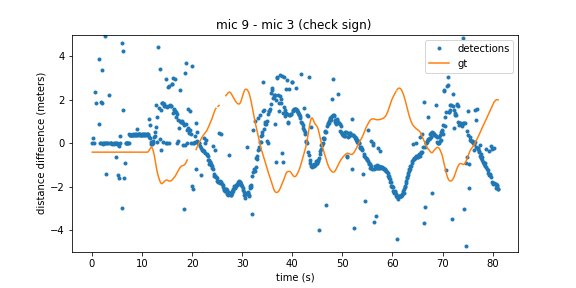

In [10]:
detections = np.load(os.path.join(result_folder, "detections.npy"))
detection_times = np.load(os.path.join(result_folder, "detection_times.npy"))


speaker_gt_pos = tdoa_datasets_module.interpolate_gt_at_times(
    data_folder, detection_times).T
positions, tdoa, time = tdoa_datasets_module.read_tdoa_sound_ground_truth(
    data_folder)
receiver_gt_positions = np.nanmedian(positions["mics"], axis=2)

tdoa_gt = np.zeros((speaker_gt_pos.shape[0], 12, 12))

for i in range(12):
    for j in range(i+1, 12):
        # check sign here
        tdoa_gt[:, i, j] = (np.linalg.norm(speaker_gt_pos - receiver_gt_positions[j, :],
                                           axis=1) - np.linalg.norm(speaker_gt_pos - receiver_gt_positions[i, :], axis=1))
        tdoa_gt[:, j, i] = -tdoa_gt[:, i, j]
# speaker_gt_pos.shape

plt.figure(figsize=(8, 4))
mic1, mic2 = np.random.permutation(detections.shape[1])[:2]
# mic2 = 2


plt.plot(detection_times, detections[:, mic1, mic2], '.')
plt.plot(detection_times, tdoa_gt[:, mic1, mic2])
plt.title(f'mic {mic2} - mic {mic1} (check sign) ')
plt.legend(["detections", "gt"])
plt.ylim(-approx_room_size/2, approx_room_size/2)
plt.xlabel("time (s)")
plt.ylabel("distance difference (meters)")


Text(0.5, 0, 'detection residual (meters)')

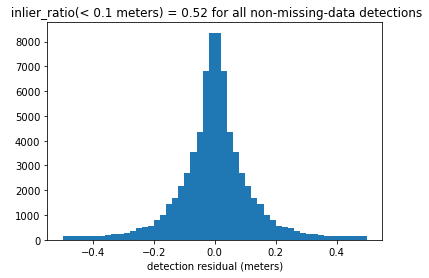

In [4]:
res = detections - tdoa_gt
res = res[np.logical_not(np.isnan(res))]
tol = 0.1

plt.hist(res[abs(res) < 0.5], 50)

plt.title(
    f' inlier_ratio(< {tol} meters) = {sum(abs(res) < tol)/np.size(res):.2f} for all non-missing-data detections')
plt.xlabel("detection residual (meters)")
# [np.logical_not(np.isnan(detections))]


In [5]:
detections = np.load(os.path.join(result_folder, "detections.npy"))
detection_times = np.load(os.path.join(result_folder, "detection_times.npy"))
tdoa_vector_times = np.load(os.path.join(
    result_folder, "tdoa_vector_times.npy"))

speaker_gt_pos = tdoa_datasets_module.interpolate_gt_at_times(
    data_folder, tdoa_vector_times).T
positions, tdoa, time = tdoa_datasets_module.read_tdoa_sound_ground_truth(
    data_folder)
receiver_gt_positions = np.nanmedian(positions["mics"], axis=2)
sender_positions = pd.read_csv(os.path.join(
    result_folder, "sender_positions.csv"), header=None).to_numpy()
pd.read_csv(os.path.join(result_folder,
            "tdoa_vectors_to_matlab.csv")).to_numpy()
pass


In [6]:


# plt.plot(receiver_gt_positions,'.')

# receiver_gt_positions.shape


## Tdoa-vector comparision

## Position-comparison

In [7]:
detections = np.load(os.path.join(result_folder, "detections.npy"))
detection_times = np.load(os.path.join(result_folder, "detection_times.npy"))
tdoa_vector_times = np.load(os.path.join(
    result_folder, "tdoa_vector_times.npy"))

speaker_gt_pos = tdoa_datasets_module.interpolate_gt_at_times(
    data_folder, tdoa_vector_times).T
positions, tdoa, time = tdoa_datasets_module.read_tdoa_sound_ground_truth(
    data_folder)
receiver_gt_positions = np.nanmedian(positions["mics"], axis=2)
sender_positions = pd.read_csv(os.path.join(
    result_folder, "sender_positions.csv"), header=None).to_numpy()
pass
receiver_positions = pd.read_csv(os.path.join(
    result_folder, "receiver_positions.csv"), header=None).to_numpy()

R, t = tdoa_datasets_module.procrustes(
    receiver_positions.T, receiver_gt_positions, tol=0.5, n_iters=1000)
receiver_positions = receiver_positions.T @ R + t

sender_positions = pd.read_csv(os.path.join(
    result_folder, "sender_positions.csv"), header=None).to_numpy()
sender_positions = sender_positions.T @ R + t


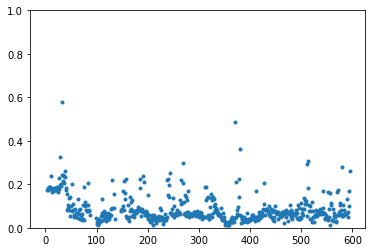

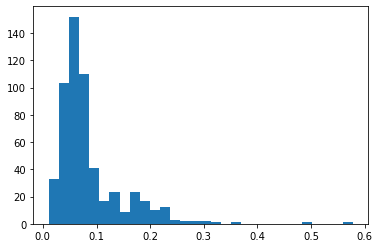

In [8]:
%matplotlib inline

speaker_gt_pos.shape
res = np.linalg.norm(speaker_gt_pos - sender_positions, axis=1)

plt.figure()
plt.plot(res, '.')
plt.ylim(0, 1)


plt.figure()

plt.hist(res[res < 1], 30)

# ax.scatter(speaker_gt_pos[:,0],speaker_gt_pos[:,1],speaker_gt_pos[:,2],'go')
# ax.scatter(sender_positions[reasonable_ind,0],sender_positions[reasonable_ind,1],sender_positions[reasonable_ind,2],'go')


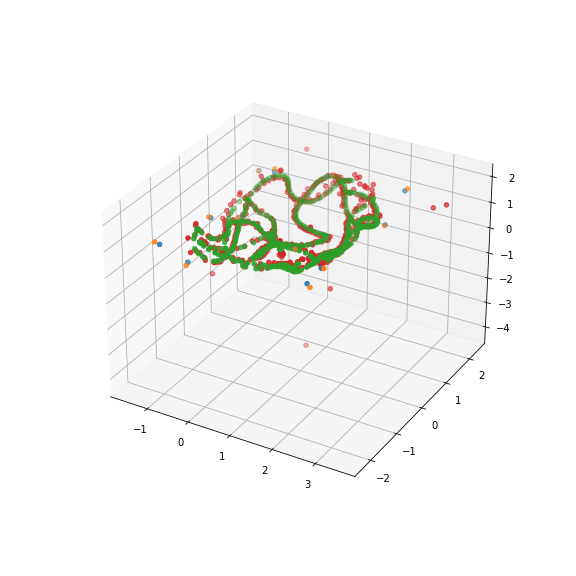

In [9]:
%matplotlib ipympl


# plt.plot(temp - receiver_gt_positions,'.')

# plt.plot(temp[])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


ax.scatter(receiver_positions[:, 0],
           receiver_positions[:, 1], receiver_positions[:, 2], 'r+')
ax.scatter(receiver_gt_positions[:, 0],
           receiver_gt_positions[:, 1], receiver_gt_positions[:, 2], 'bo')

ax.scatter(speaker_gt_pos[:, 0], speaker_gt_pos[:, 1],
           speaker_gt_pos[:, 2], 'go')
reasonable_ind = np.all(np.logical_and(
    sender_positions < 10, sender_positions > -10), axis=1)
ax.scatter(sender_positions[reasonable_ind, 0],
           sender_positions[reasonable_ind, 1], sender_positions[reasonable_ind, 2], 'go')
